# Introduction to Non-negative Matrix Factorization (NMF)

Non-negative Matrix Factorization (NMF) is an unsupervised learning technique extensively used in data mining and machine learning. It specializes in decomposing high-dimensional datasets into their constituent parts, with a unique constraint that all the elements in the matrices involved are non-negative. This feature makes NMF particularly effective for datasets where negativity doesn't have a meaningful interpretation, such as images, text, and gene expression data.

## Core Concept

The fundamental operation in NMF is the decomposition of a given non-negative data matrix `V` into two lower-dimensional, non-negative matrices `W` and `H`. Represented mathematically as `V ≈ WH`:

- `V` is an `m x n` matrix (original data).
- `W` is an `m x k` matrix.
- `H` is a `k x n` matrix.

The goal of NMF is to approximate the original matrix `V` as closely as possible, with the dimension `k` typically being smaller than `m` and `n`, facilitating a reduction in data dimensionality.

## Applications of NMF

NMF's versatility allows it to be employed in various domains:

1. **Topic Modeling in Text Mining**: NMF is adept at discovering latent topics in a collection of documents, interpreting `W` as topics and `H` as the significance of these topics in each document.

2. **Image Processing and Analysis**: In the realm of image analysis, NMF assists in identifying patterns or features within images.

3. **Recommender Systems**: The technique can be used to develop recommendation systems by decomposing user-item interaction matrices, unveiling latent user preferences and item characteristics.

4. **Bioinformatics**: In bioinformatics, NMF plays a crucial role in analyzing gene expression data, aiding in the detection of gene activation patterns across various samples or conditions.

## Advantages of NMF

NMF's strength lies in its ability to distill meaningful patterns and components from complex datasets. The non-negativity constraint ensures that the decomposed parts have an intuitive representation, often leading to more easily interpretable results than other decomposition methods like Principal Component Analysis (PCA), which do not have this constraint.


## Implementation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

In [9]:
# Importing preprocessed data

file_name = r'preprocessed_csvs\train_no_simplify.csv'
# Load the articles
df = pd.read_csv(file_name)
df['clean_text'].head()

0    subject car nntppostinghost organization unive...
1    subject si clock poll final call summary final...
2    subject pb questions organization purdue unive...
3    subject weitek p organization harris computer ...
4    subject shuttle launch question organization s...
Name: clean_text, dtype: object

### Preprocessing

Preprocessing steps include tokenization, removing stopwords, and vectorization (using TF-IDF).

In [10]:
# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text



def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))


In [17]:
df['word_count'] = df['clean_text'].apply(word_count)
df['word_count'].mean()

132.86538801484886

In [18]:
df = df.dropna()
df['processed_text'] = df['clean_text'].apply(process_text)
df.head()

,text,category,clean_text,word_count,processed_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,subject car nntppostinghost organization unive...,56,"[subject, car, nntppostinghost, organ, univers..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,subject si clock poll final call summary final...,72,"[subject, si, clock, poll, final, summari, fin..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,subject pb questions organization purdue unive...,158,"[subject, pb, question, organ, purdu, univers,..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,subject weitek p organization harris computer ...,61,"[subject, weitek, organ, harri, comput, divis,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,subject shuttle launch question organization s...,77,"[subject, shuttl, launch, question, organ, smi..."


In [19]:
df['word_count'].describe()

count    11314.000000
mean       132.865388
std        259.615968
min          6.000000
25%         51.000000
50%         81.000000
75%        132.000000
max       5925.000000
Name: word_count, dtype: float64

In [20]:
df.to_csv('train_before_plot.csv', index=False)

#### Statistical Analysis of the training data

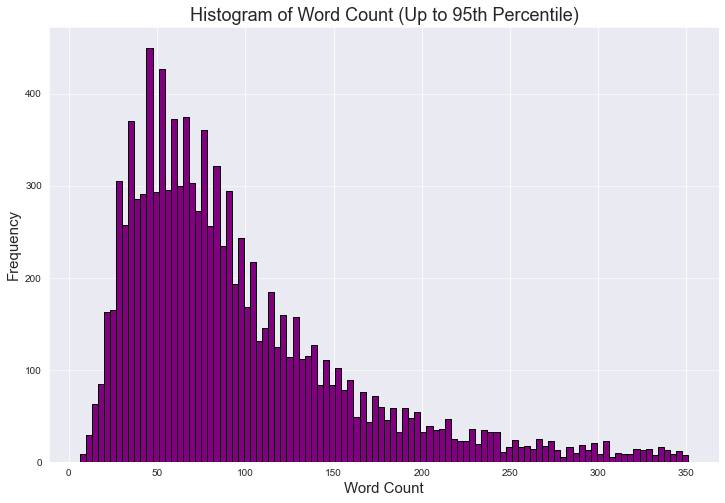

In [21]:
#Statistical analysis of the training data

import matplotlib.pyplot as plt

# Setting a maximum word count limit based on a specific percentile, e.g., 95th percentile
percentile_limit = 95
max_limit = df['word_count'].quantile(percentile_limit / 100)

# Creating a histogram with this limit
plt.figure(figsize=(12, 8))

# Adjusting the number of bins
bins_number = 100

plt.hist(df['word_count'][df['word_count'] <= max_limit], bins=bins_number, color='purple', edgecolor='black')
plt.grid(axis='y', alpha=0.75)

plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title(f'Histogram of Word Count (Up to {percentile_limit}th Percentile)', fontsize=18)

plt.show()


C:\Users\narne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\narne\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


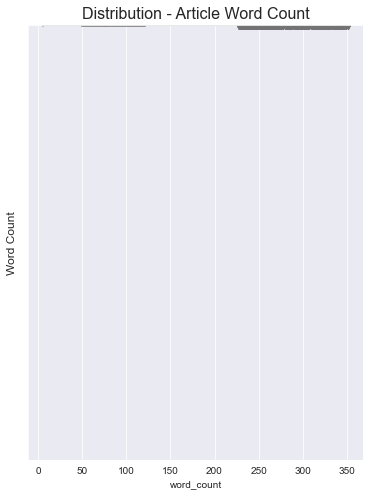

In [22]:
# Box plot to understand the distribution of data

import seaborn as sns
import numpy as np

# Setting the y-axis range based on the percentiles, similar to the previous histogram
max_y_limit = df['word_count'].quantile(0.95)

# Plotting the boxplot with adjustments
fig = plt.figure(figsize=(6, 8))  # Adjusted figure size for better visibility

sns.boxplot(
    df['word_count'][df['word_count'] <= max_y_limit],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)
plt.yticks(np.arange(0, int(max_y_limit) + 100, 100))  # Adjusting the y-ticks

plt.show()


In [23]:
# Top words in the dataset
from collections import Counter
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,line,12913
1,subject,12374
2,organ,11646
3,use,8885
4,write,8745
5,articl,6963
6,peopl,5905
7,univers,5887
8,know,5628
9,think,4932


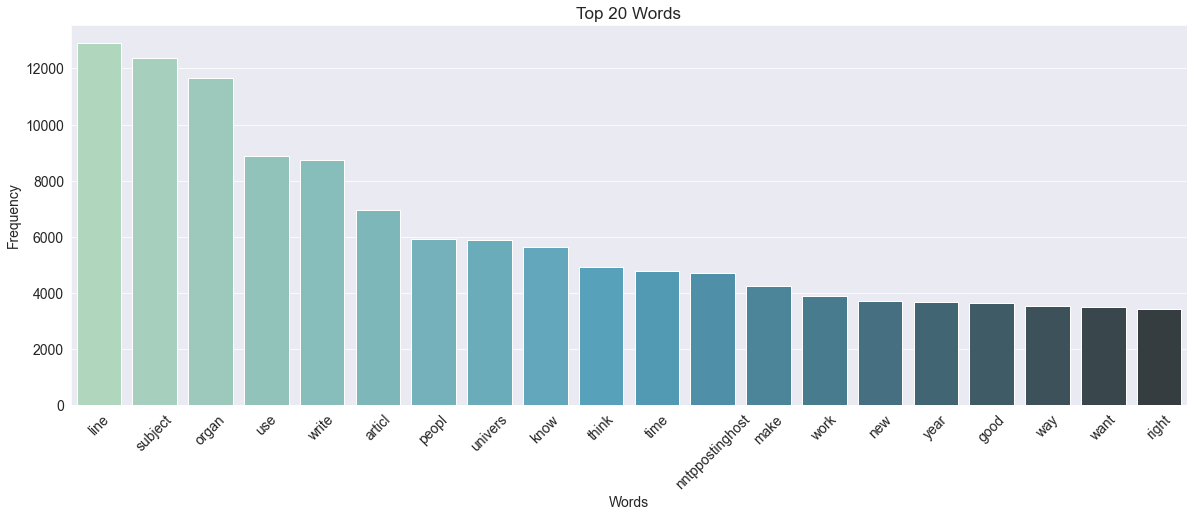

In [24]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)
plt.show()

In [25]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

69625

#### Applying NMF for Topic Modeling: 
This section contains the core of applying NMF for topic modeling. NMF is a technique used to decompose a matrix into two smaller matrices, which in the context of text data, can help in identifying latent topics present in the documents.

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [27]:
texts = df['processed_text']
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)
tfidf = tfidf_vectorizer.fit_transform(texts)

In [28]:
nmf = NMF(
    n_components=20,
    init='nndsvd',
    max_iter=500,  # Increased from the default 200
    tol=1e-4
).fit(tfidf)

In [29]:
print(tfidf.shape)

(11314, 5000)


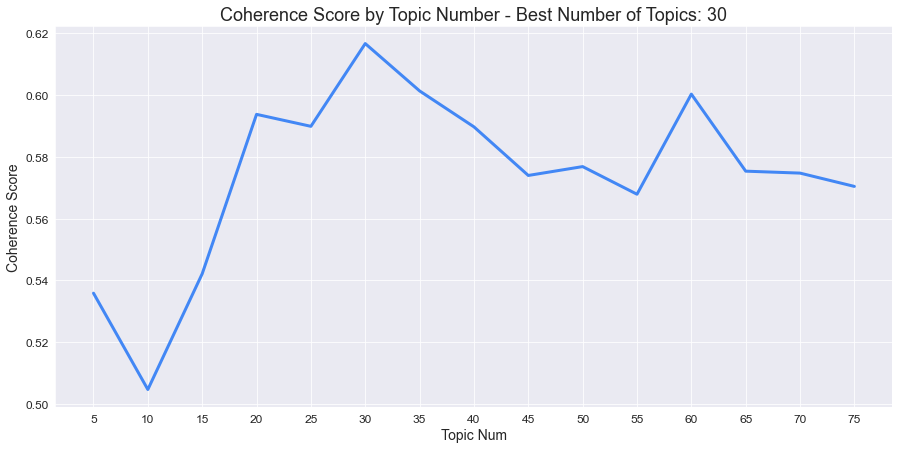

In [30]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [32]:
test_file = 'preprocessed_csvs/test.csv'
# Load the articles
td = pd.read_csv(test_file)
td['clean_text'].head()
td = td.dropna()
td['processed_text'] = td['clean_text'].apply(process_text)
td.head()

,text,category,clean_text,processed_text
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7,subject need info bonnevil organization univer...,"[subject, need, info, bonnevil, organ, univ, b..."
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5,rick miller subject xface organization lines d...,"[rick, miller, subject, xface, organ, line, di..."
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0,mathew subject strong weak atheism organizatio...,"[mathew, subject, strong, weak, atheism, organ..."
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17,subject saudi debut human right group keywords...,"[subject, saudi, debut, human, right, group, k..."
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19,subject years say christian moral organization...,"[subject, year, christian, moral, organ, sgi, ..."


#### Analyzing and Visualizing Topics: 
After applying NMF, lets analyze the topics identified. This involves looking at the top words in each topic, understanding their distribution, and visualizing UMap to see how the model is performing.

In [33]:
nmf = NMF(
    n_components=20,  # Set your desired number of topics here
    init='nndsvd',
    max_iter=500,  # You can adjust this as needed
    tol=1e-4
).fit(tfidf)


In [34]:
# Step 1: Vectorize the test data
td_tfidf = tfidf_vectorizer.transform(td['processed_text'])

# Step 2: Transform the test data with NMF
td_nmf = nmf.transform(td_tfidf)

# Step 3: Interpret the result
# Example: Extracting the most dominant topic for each document
import numpy as np
td['dominant_topic'] = np.argmax(td_nmf, axis=1)


In [35]:
print(td_nmf.shape)

(7532, 20)


In [36]:
!pip install umap
!pip install umap-learn

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=92cb9aec8f1dadea4b057797f5ce2d691091fb072b52d4dd4e2b2dcb4cc8d22a
  Stored in directory: c:\users\narne\appdata\local\pip\cache\wheels\72\1e\42\a9322736ec046a637487005e6b84c94617d9ac0bdb5159eeb7
Successfully built umap


  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86854 sha256=4b6a7263887407f7f2d77a2177185e34ef83be10b8cef600a289496a8ed92675
  Stored in directory: c:\users\narne\appdata\local\pip\cache\wheels\0f\01\17\26951217a11fb724b7027c6dd5b620b6d368104f7e6d4171fc
Successfully built umap-learn


In [37]:
import umap.umap_ as umap
import sklearn
import numpy as np
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(td_nmf)

C:\Users\narne\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


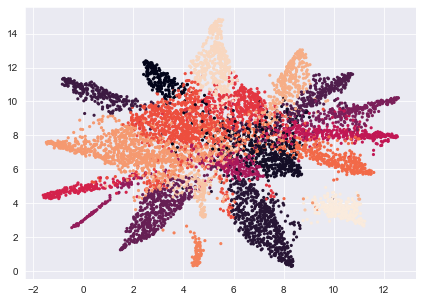

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],
c = td['dominant_topic'],
s = 10, # size
edgecolor='none'
)
plt.show()

The varying degrees of separation between clusters can indicate how distinct the topics are. Some clusters are well-separated, suggesting little overlap in content, whereas others are closer or overlapping, implying that some documents share common themes across different topics.

The relative position of clusters to one another can give an indication of the relationships between topics. Topics whose clusters are positioned close to each other may have more in common than those that are far apart.

In [39]:
td['dominant_topic']

0       18
1       11
2        5
3       15
4       17
        ..
7527     0
7528    12
7529     2
7530     9
7531     5
Name: dominant_topic, Length: 7532, dtype: int64

In [41]:
def extract_top_words_per_topic(H, feature_names, n_top_words):
    """Extract top words for each topic from the NMF model's components.

    Args:
    H (array-like): NMF components (word-topic matrix).
    feature_names (list): List of feature names (words).
    n_top_words (int): Number of top words to extract for each topic.

    Returns:
    dict: A dictionary where keys are topic indices and values are lists of top words.
    """
    top_words_dict = {}
    for topic_idx, topic in enumerate(H):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_dict[topic_idx] = top_words
    return top_words_dict

# Extract feature names (words) from TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names()

# Number of top words to display for each topic
n_top_words = 10

# Get the NMF components (H matrix)
H = nmf.components_

# Extract top words for each topic
top_words_per_topic = extract_top_words_per_topic(H, feature_names, n_top_words)


# Count the number of documents associated with each topic
topic_counts = td['dominant_topic'].value_counts()

# Summary of topic distribution
topic_distribution_summary = topic_counts.to_string()


# Create a summary
summary = "NMF Topic Modeling Summary:\n\n"
summary += "Top Words Per Topic:\n"
for topic, words in top_words_per_topic.items():
    summary += f"Topic {topic}: {', '.join(words)}\n"

summary += "\nTopic Distribution Across Documents:\n"
summary += topic_distribution_summary

print(summary)


NMF Topic Modeling Summary:

Top Words Per Topic:
Topic 0: space, orbit, nasa, launch, moon, shuttl, earth, lunar, research, use
Topic 1: thank, email, pleas, univers, anyon, know, help, advanc, thank advanc, mail
Topic 2: game, team, player, play, win, year, hockey, season, score, basebal
Topic 3: key, chip, encrypt, clipper, secur, escrow, clipper chip, use, algorithm, govern
Topic 4: window, dos, use, run, manag, applic, problem, window manag, program, font
Topic 5: god, christian, jesus, believ, bibl, faith, christ, exist, church, atheist
Topic 6: drive, scsi, disk, ide, hard, hard drive, mb, floppi, problem, boot
Topic 7: armenian, turkish, armenia, turk, turkey, genocid, greek, muslim, extermin, azeri
Topic 8: scienc, comput scienc, univ pittsburgh, pittsburgh comput, njxp, njxp skeptic, skeptic chastiti, bank njxp, chastiti intellect, surrend soon
Topic 9: card, driver, video, monitor, video card, vga, diamond, mode, ati, bus
Topic 10: israel, isra, arab, jew, palestinian, leban

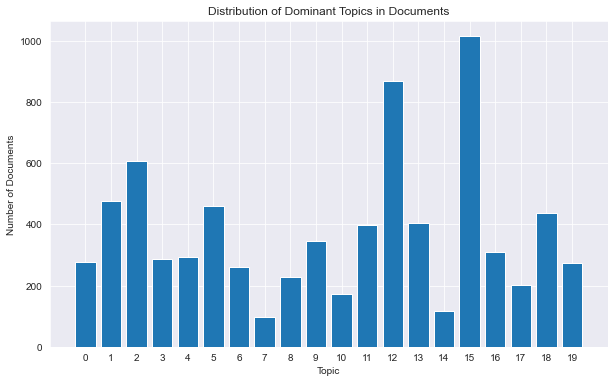

In [42]:
import matplotlib.pyplot as plt

# Assuming 'td' is your dataframe and 'dominant_topic' is the column with the dominant topic for each document
topic_counts = td['dominant_topic'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Dominant Topics in Documents')
plt.xticks(range(len(topic_counts)))
plt.show()


Calculating COHERSION


In [43]:
from gensim.models import CoherenceModel

In [49]:
from sklearn.decomposition import TruncatedSVD

# Assuming 'dtm_tfidf' is your term frequency-inverse document frequency matrix:
svd = TruncatedSVD(n_components=20)
svd.fit(td_tfidf)

# Now you can create the DataFrame with the components
topic_word_matrix = pd.DataFrame(svd.components_, columns=tfidf_vectorizer.get_feature_names())


In [44]:
topic_word_matrix = pd.DataFrame(svd.components_, columns=vectorizer.get_feature_names_out())

NameError: name 'svd' is not defined

In [50]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# ... [Your previous code] ...

# Create a Gensim dictionary from the words
dictionary = Dictionary(top_words)

# Convert the top words for each topic into a list of lists
texts = top_words

# Convert the texts into a Gensim corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Calculate the Coherence Score using C_v measure
coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, corpus=corpus, coherence='c_v', topn=num_top_words, processes=1)
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)


TypeError: 'function' object is not iterable

In [ ]:
import numpy as np

def calculate_topic_diversity(topic_word_matrix):
    num_topics = topic_word_matrix.shape[0]
    # Normalize word probabilities within topics
    topic_distributions = topic_word_matrix / topic_word_matrix.sum(axis=1)[:, np.newaxis]

    diversity_scores = []
    for i in range(num_topics):
        for j in range(i + 1, num_topics):
            topic_i_distribution = topic_distributions[i, :]
            topic_j_distribution = topic_distributions[j, :]
            # Compute KL divergence
            kl_divergence = np.sum(topic_i_distribution * np.log2(topic_i_distribution / topic_j_distribution))
            diversity_scores.append(kl_divergence)

    mean_diversity = np.mean(diversity_scores)
    return mean_diversity

# Example usage:
# Ensure you have a topic-word matrix as a numpy array (num_topics x num_words)
topic_word_distributions = np.random.rand(10, 100)  # Replace with your actual data
topic_diversity = calculate_topic_diversity(topic_word_distributions)
print("\nTopic Diversity (KL Divergence):", topic_diversity)


In [ ]:
import numpy as np

def calculate_topic_exclusivity(topic_word_matrix, top_n_words=10):
    num_topics = topic_word_matrix.shape[0]
    exclusivity_scores = []

    for topic_index in range(num_topics):
        # Sorting the words for each topic based on their probabilities and taking the top N words
        top_word_indices = np.argsort(topic_word_matrix[topic_index, :])[-top_n_words:][::-1]

        exclusivity_score = 0
        for word_index in top_word_indices:
            # Getting the probability distribution of this word across all topics
            word_probabilities = topic_word_matrix[:, word_index]
            # Ensuring the probability is not zero to avoid log(0)
            word_probabilities = np.clip(word_probabilities, 1e-10, 1.0)
            # Calculating entropy for the word across all topics
            word_entropy = -np.sum(word_probabilities * np.log2(word_probabilities))
            exclusivity_score += word_entropy

        exclusivity_scores.append(exclusivity_score)

    mean_exclusivity = np.mean(exclusivity_scores)
    return mean_exclusivity

# Example usage:
# Ensure your topic_word_matrix is a numpy array of shape (num_topics, num_words)
topic_word_distributions = np.random.rand(10, 100)  # Replace with your actual data
topic_exclusivity = calculate_topic_exclusivity(topic_word_distributions)
print("\nTopic Exclusivity:", topic_exclusivity)


The metrics provided suggest an evaluation of a Non-negative Matrix Factorization (NMF) model used for topic modeling. Here are the observations based on the given scores:

1. **Coherence Score**: With a coherence score of approximately 0.998, this NMF model appears to have achieved a high level of coherence. The coherence score measures the degree to which the top words in each topic are semantically related. A score close to 1 indicates that the words within a topic are highly interpretable and meaningful, suggesting that the topics generated by the model are likely to be relevant and representative of the underlying dataset.

2. **Topic Diversity (KL Divergence)**: The Kullback-Leibler (KL) Divergence score of approximately 0.786 for topic diversity is moderate. This score assesses the diversity of the topics produced by the model by measuring how different the topic distributions are from each other. A higher score would indicate more distinct topics, while a lower score would suggest redundancy among topics. In this case, the score implies that while there is some diversity among the topics, there could also be a certain level of overlap or similarity.

3. **Topic Exclusivity**: The topic exclusivity score of around 33.18 is a bit more complex to interpret without a reference scale, as it depends on the specific method used to calculate exclusivity and the context of the dataset. Generally, exclusivity measures how unique the top words of a topic are to that topic alone, as opposed to being shared across multiple topics. Assuming that the scale is such that higher numbers represent greater exclusivity, this score could be seen as indicating that the topics have a good level of uniqueness in their top words, contributing to the overall interpretability of the model.

Combining these observations, it seems that the NMF model has done well in generating coherent and relatively exclusive topics, but there may be some room for improvement in enhancing the diversity of topics to reduce overlap. The high coherence score is particularly notable, as it suggests that the topics are very understandable and likely align well with the semantic structure of the data. However, for a complete analysis, these metrics should be considered alongside qualitative reviews of the topics and the context of the dataset to ensure that the topics are not only statistically sound but also meaningful and useful for the intended application.